# Favoring_Gwajang_Moon

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

# import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, CategoricalNB
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import statsmodels.api as sm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import statsmodels.api as sm

from sklearn.tree import export_graphviz

import joblib


In [ ]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
# from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
# from tensorflow.keras. models import Sequential
# from tensorflow.keras. layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Reading

In [ ]:
train.columns

Index(['ibk_seq', 'id_seq.x', 'base_ym', 'crn', 'enr', 'default_tf',
       'bsn_opr_month', 'count', 'pblntf_bins', 'inno_cert_date_cnt',
       'venture_cert_date_cnt', 'smallgiant_brand_tf', 'ysbg_year_tf',
       'importer_tf', 'exporter_tf', 'resoven_cert_dum', 'soven_cert_dum',
       'lab_cnt', 'growth_up_tf', 'finance_seq_tf', 'fnl_sucsf_cnt',
       'cntrct_cncls_cnt', 'rnd_ing_tf', 'rnd_seq_cnt', 'utility_cnt',
       'design_cnt', 'design_app_date_tf', 'cprgt_cnt', 'total', 'article_cnt',
       'inno_exp_dum', 'manpower_seq_tf2', 'stream_month_tf2', 'nps_end_bins',
       'emp_delta_bins', 'majority_bins', 'agg_majority_bins', 'rnd_amt_bin',
       'corporate_type_기타법인', 'corporate_type_단위공업협동조합,특수공업협동조합, 공업협동조합중앙회',
       'corporate_type_법무법인, 법무법인(유한)', 'corporate_type_법무사법인, 법무사법인(유한)',
       'corporate_type_사단법인', 'corporate_type_유한책임회사', 'corporate_type_유한회사',
       'corporate_type_재단법인', 'corporate_type_정보없음', 'corporate_type_주식회사',
       'corporate_type_중소기업협동조합,

In [ ]:
total = pd.read_excel('/content/drive/MyDrive/antock/modeling_data_new_vars_with_dum_split2_220929.xlsx', sheet_name='Whole')

In [ ]:
total.to_csv("/content/drive/MyDrive/antock/whole.csv", mode='w', index=False)

In [ ]:
train = pd.read_excel('/content/drive/MyDrive/antock/modeling_data_new_vars_with_dum_split2_220929.xlsx', sheet_name='Train')

In [ ]:
test = pd.read_excel('/content/drive/MyDrive/antock/modeling_data_new_vars_with_dum_split2_220929.xlsx', sheet_name='Test')

In [ ]:
train

,ibk_seq,id_seq.x,base_ym,crn,enr,default_tf,bsn_opr_month,count,pblntf_bins,inno_cert_date_cnt,...,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,default,split
0,11,65967,2017-02-28,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
1,12,65967,2017-03-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
2,13,65967,2017-04-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
3,14,65967,2017-06-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
4,15,65967,2017-07-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167138,267547,969194,2020-05-31,131-86-71327,285015-0000197,N,64,0,5,0,...,0,0,0,0,0,0,1,0,0,train
167139,267548,969194,2020-06-30,131-86-71327,285015-0000197,N,64,0,5,0,...,0,0,0,0,0,0,1,0,0,train
167140,267549,969194,2020-07-31,131-86-71327,285015-0000197,N,64,0,5,0,...,0,0,0,0,0,0,1,0,0,train
167141,267550,969194,2020-08-31,131-86-71327,285015-0000197,N,64,0,5,0,...,0,0,0,0,0,0,1,0,0,train


In [ ]:
X_train= train.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_train= train["default"]

In [ ]:
test

,ibk_seq,id_seq.x,base_ym,crn,enr,default_tf,bsn_opr_month,count,pblntf_bins,inno_cert_date_cnt,...,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,default,split
0,1,769252,2018-11-30,104-81-15653,110111-0006399,N,679,0,10,0,...,0,0,0,0,0,0,1,0,0,test
1,2,769252,2018-12-31,104-81-15653,110111-0006399,N,679,0,10,0,...,0,0,0,0,0,0,1,0,0,test
2,3,769252,2019-01-31,104-81-15653,110111-0006399,N,679,0,10,0,...,0,0,0,0,0,0,1,0,0,test
3,4,769252,2019-02-28,104-81-15653,110111-0006399,N,679,0,10,0,...,0,0,0,0,0,0,1,0,0,test
4,5,769252,2019-03-31,104-81-15653,110111-0006399,N,679,0,10,0,...,0,0,0,0,0,0,1,0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71522,267523,884785,2021-03-31,236-88-01853,285011-0458980,N,18,0,4,0,...,0,0,0,0,0,0,1,0,0,test
71523,267524,884785,2021-04-30,236-88-01853,285011-0458980,N,18,0,4,0,...,0,0,0,0,0,0,1,0,0,test
71524,267527,943839,2021-03-31,723-87-0,285011-0461040,N,0,0,4,0,...,0,0,0,0,0,0,1,0,0,test
71525,267528,943839,2021-04-30,723-87-0,285011-0461040,N,0,0,4,0,...,0,0,0,0,0,0,1,0,0,test


In [ ]:
X_test= test.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_test= test["default"]

# Logitstic

In [ ]:
lr_clf = LogisticRegression().fit(X_train, y_train)
pred = lr_clf.predict(X_test)

print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[70064     0]
 [ 1463     0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70064
           1       0.00      0.00      0.00      1463

    accuracy                           0.98     71527
   macro avg       0.49      0.50      0.49     71527
weighted avg       0.96      0.98      0.97     71527



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [ ]:
wlr_clf = LogisticRegression(class_weight={0:2, 1:98}).fit(X_train, y_train)
w_pred = wlr_clf.predict(X_test)

print(confusion_matrix(y_test, w_pred))

print(classification_report(y_test, w_pred))

[[43161 26903]
 [  375  1088]]
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     70064
           1       0.04      0.74      0.07      1463

    accuracy                           0.62     71527
   macro avg       0.52      0.68      0.42     71527
weighted avg       0.97      0.62      0.75     71527



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
bnb_clf = BernoulliNB().fit(X_train, y_train)
pred_bnb = bnb_clf.predict(X_test)

confusion_matrix(y_test, pred_bnb)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [ ]:
cnb_clf = CategoricalNB().fit(X_train, y_train)
pred_cnb = cnb_clf.predict(X_test)

confusion_matrix(y_test, pred_cnb)

ValueError: Negative values in data passed to CategoricalNB (input X)

# Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(class_weight={0:1500, 1:10000000}).fit(X_train, y_train)

In [ ]:
pred1 = dt_clf.predict(X_test)

confusion_matrix(y_test, pred1)

array([[68507,  1557],
       [ 1333,   130]])

In [ ]:
pred1

array([0, 0, 0, ..., 0, 0, 1])

# RandomForest

In [ ]:
rf_clf=RandomForestClassifier(class_weight={0:1500, 1:10000000}).fit(X_train, y_train)

In [ ]:
pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)

array([[69582,   482],
       [ 1407,    56]])

In [ ]:
pred_pro_rf = rf_clf.predict_proba(X_test)
pred_pro_rf

array([[1.       , 0.       ],
       [1.       , 0.       ],
       [1.       , 0.       ],
       ...,
       [1.       , 0.       ],
       [1.       , 0.       ],
       [0.9800003, 0.0199997]])

In [ ]:
pred_pro_rf[530:550]

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.95000862, 0.04999138],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [ ]:
leng = len(pred_pro_rf[:,0])
leng

71527

In [ ]:
adj_pro_rf = [] # 수정된 값 넣기
for a in range(leng):  
  if pred_pro_rf[a,1]>0.2:
    adj_pro_rf.append(1)
  else:
    adj_pro_rf.append(0)

In [ ]:
len(adj_pro_rf)

71527

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     70064
           1       0.10      0.04      0.06      1463

    accuracy                           0.97     71527
   macro avg       0.54      0.52      0.52     71527
weighted avg       0.96      0.97      0.97     71527



In [ ]:
print(classification_report(y_test, adj_pro_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     70064
           1       0.09      0.11      0.10      1463

    accuracy                           0.96     71527
   macro avg       0.54      0.54      0.54     71527
weighted avg       0.96      0.96      0.96     71527



In [ ]:
importances = rf_clf.feature_importances_
std =np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Feature Ranking

In [ ]:
print("Feature Ranking :")
for f in range(X_train.shape[1]):
    print("{}. {} - {:.6f}".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

In [ ]:
print("F1 Score: ", f1_score(y_test, pred_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, pred_rf))
print("Accuracy: ",accuracy_score(y_test, pred_rf))
print("Precision: ",precision_score(y_test, pred_rf))
print("Recall: ", recall_score(y_test, pred_rf))

F1 Score:  0.05597201399300349
ROC-AUC Score:  0.5156990437177874
Accuracy:  0.9735903924392187
Precision:  0.10408921933085502
Recall:  0.03827751196172249


In [ ]:
print("F1 Score: ", f1_score(y_test, adj_pro_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, adj_pro_rf))
print("Accuracy: ",accuracy_score(y_test, adj_pro_rf))
print("Precision: ",precision_score(y_test, adj_pro_rf))
print("Recall: ", recall_score(y_test, adj_pro_rf))

F1 Score:  0.09879670677644077
ROC-AUC Score:  0.5423322902353352
Accuracy:  0.9602108294769807
Precision:  0.0920353982300885
Recall:  0.10663021189336978


In [ ]:
confusion_matrix(y_test, pred_rf)

array([[69582,   482],
       [ 1407,    56]])

In [ ]:
confusion_matrix(y_test, adj_pro_rf)

array([[68525,  1539],
       [ 1307,   156]])

# try 1

In [ ]:
adj_pro_rf = [] # 수정된 값 넣기
for a in range(leng):  
  if pred_pro_rf[a,1]>0.15:
    adj_pro_rf.append(1)
  else:
    adj_pro_rf.append(0)

In [ ]:
len(adj_pro_rf)

71527

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     70064
           1       0.09      0.03      0.05      1463

    accuracy                           0.97     71527
   macro avg       0.54      0.51      0.52     71527
weighted avg       0.96      0.97      0.97     71527



In [ ]:
print(classification_report(y_test, adj_pro_rf))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     70064
           1       0.09      0.14      0.11      1463

    accuracy                           0.95     71527
   macro avg       0.54      0.56      0.54     71527
weighted avg       0.96      0.95      0.96     71527



In [ ]:
print("F1 Score: ", f1_score(y_test, pred_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, pred_rf))
print("Accuracy: ",accuracy_score(y_test, pred_rf))
print("Precision: ",precision_score(y_test, pred_rf))
print("Recall: ", recall_score(y_test, pred_rf))

F1 Score:  0.04975124378109453
ROC-AUC Score:  0.5135414177323979
Accuracy:  0.9732967970137151
Precision:  0.09140767824497258
Recall:  0.03417634996582365


In [ ]:
print("F1 Score: ", f1_score(y_test, adj_pro_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, adj_pro_rf))
print("Accuracy: ",accuracy_score(y_test, adj_pro_rf))
print("Precision: ",precision_score(y_test, adj_pro_rf))
print("Recall: ", recall_score(y_test, adj_pro_rf))

F1 Score:  0.10990150336962155
ROC-AUC Score:  0.5568752480887702
Accuracy:  0.9519901575628783
Precision:  0.08851774530271399
Recall:  0.14490772385509226


In [ ]:
confusion_matrix(y_test, pred_rf)

array([[69567,   497],
       [ 1413,    50]])

In [ ]:
confusion_matrix(y_test, adj_pro_rf)

array([[67881,  2183],
       [ 1251,   212]])

# try 2

In [ ]:
adj_pro_rf = [] # 수정된 값 넣기
for a in range(leng):  
  if pred_pro_rf[a,1]>0.1:
    adj_pro_rf.append(1)
  else:
    adj_pro_rf.append(0)

In [ ]:
len(adj_pro_rf)

71527

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     70064
           1       0.09      0.03      0.05      1463

    accuracy                           0.97     71527
   macro avg       0.54      0.51      0.52     71527
weighted avg       0.96      0.97      0.97     71527



In [ ]:
print(classification_report(y_test, adj_pro_rf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     70064
           1       0.08      0.19      0.11      1463

    accuracy                           0.94     71527
   macro avg       0.53      0.57      0.54     71527
weighted avg       0.96      0.94      0.95     71527



In [ ]:
print("F1 Score: ", f1_score(y_test, pred_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, pred_rf))
print("Accuracy: ",accuracy_score(y_test, pred_rf))
print("Precision: ",precision_score(y_test, pred_rf))
print("Recall: ", recall_score(y_test, pred_rf))

F1 Score:  0.04975124378109453
ROC-AUC Score:  0.5135414177323979
Accuracy:  0.9732967970137151
Precision:  0.09140767824497258
Recall:  0.03417634996582365


In [ ]:
print("F1 Score: ", f1_score(y_test, adj_pro_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, adj_pro_rf))
print("Accuracy: ",accuracy_score(y_test, adj_pro_rf))
print("Precision: ",precision_score(y_test, adj_pro_rf))
print("Recall: ", recall_score(y_test, adj_pro_rf))

F1 Score:  0.11160354552780016
ROC-AUC Score:  0.5716609534382158
Accuracy:  0.9383449606442322
Precision:  0.07912025135675521
Recall:  0.18933697881066303


In [ ]:
confusion_matrix(y_test, pred_rf)

array([[69567,   497],
       [ 1413,    50]])

In [ ]:
confusion_matrix(y_test, adj_pro_rf)

array([[66840,  3224],
       [ 1186,   277]])

# Logistic (again)

In [ ]:
log_reg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

pred_lr = log_reg.predict(X_test)

confusion_matrix(y_test, pred_lr)

array([[69907,    17],
       [ 1661,    16]], dtype=int64)

In [ ]:
df = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/modeling_data_test_with_dum_220713.xlsx', sheet_name='Sheet1')

In [ ]:
X = df.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y = df["default"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
X_train

,bsn_opr_month,homepage_tf,email_tf,count,inno_cert_date_cnt,venture_cert_date_cnt,ysbg_year_tf,resoven_cert_date_cnt,lab_cnt,utility_cnt,...,research_lab_type_전담부서,inv_type_M&A,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A
194135,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
107505,46,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
89748,51,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
187287,47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
190008,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176963,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117952,38,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
173685,171,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43567,21,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_test

,bsn_opr_month,homepage_tf,email_tf,count,inno_cert_date_cnt,venture_cert_date_cnt,ysbg_year_tf,resoven_cert_date_cnt,lab_cnt,utility_cnt,...,research_lab_type_전담부서,inv_type_M&A,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A
173215,312,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
77755,43,1,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
127867,42,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
64417,78,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
50063,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237798,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
169723,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
57256,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
182954,75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
pred1 = dt_clf.predict(X_test)

confusion_matrix(y_test, pred1)

array([[69675,   367],
       [  525,  1034]], dtype=int64)

In [ ]:
rf_clf=RandomForestClassifier().fit(X_train, y_train)

In [ ]:
pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)

array([[69767,   275],
       [  539,  1020]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     70042
           1       0.79      0.65      0.71      1559

    accuracy                           0.99     71601
   macro avg       0.89      0.83      0.85     71601
weighted avg       0.99      0.99      0.99     71601



In [ ]:
print("F1 Score: ", f1_score(y_test, pred_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, pred_rf))
print("Accuracy: ",accuracy_score(y_test, pred_rf))
print("Precision: ",precision_score(y_test, pred_rf))
print("Recall: ", recall_score(y_test, pred_rf))

F1 Score:  0.7147862648913805
ROC-AUC Score:  0.825169669571848
Accuracy:  0.9886314436949205
Precision:  0.7876447876447876
Recall:  0.654265554842848


# 기업별 Base_ym 중간값 샘플 적용

In [ ]:
train = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix2/modeling_data_test_with_dum_220714.xlsx', sheet_name='Train')

In [ ]:
test = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix2/modeling_data_test_with_dum_220714.xlsx', sheet_name='Test')

In [ ]:
train.head()

,ibk_seq,id_seq,base_ym,crn,enr,default_tf,bsn_opr_month,homepage_tf,email_tf,count,...,inv_type_M&A,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,default
0,60360,1115227,2020-10-31,566-88-00769,160111-0463333,N,58,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,60359,1115226,2020-11-30,662-86-01742,191211-0035274,N,25,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,60358,1115192,2020-06-30,537-81-01572,120111-1031591,N,31,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60357,1115067,2017-12-31,341-81-00123,200111-0431521,N,84,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,60355,1115021,2018-07-31,304-81-31710,110111-5812618,N,82,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
test.head()

,ibk_seq,id_seq,base_ym,crn,enr,default_tf,bsn_opr_month,homepage_tf,email_tf,count,...,inv_type_M&A,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,default
0,18109,273807,2020-07-31,396-86-00337,110111-6072740,N,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,18107,273805,2020-02-29,529-87-01379,210111-0138539,N,42,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,18105,273796,2018-06-30,124-87-55699,135811-0261669,N,78,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18106,273796,2020-07-31,124-87-55699,135811-0261669,N,78,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18103,273783,2017-07-31,271-88-00110,131111-0411444,N,85,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train= train.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_train= train["default"]

In [ ]:
X_test= test.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_test= test["default"]

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

pred1 = dt_clf.predict(X_test)

confusion_matrix(y_test, pred1)



array([[17377,   355],
       [  349,    27]], dtype=int64)

In [ ]:
rf_clf=RandomForestClassifier().fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)


array([[17689,    43],
       [  367,     9]], dtype=int64)

In [ ]:
importances = rf_clf.feature_importances_
std =np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature Ranking :")
for f in range(X_train.shape[1]):
    print("{}. {} - {:.6f}".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

Feature Ranking :
1. bsn_opr_month - 0.395620
2. pblntf_bins - 0.124828
3. total - 0.100406
4. manpower_seq_tf2 - 0.046167
5. homepage_tf - 0.025383
6. ksic_code2_C - 0.018667
7. ceo_dum - 0.018511
8. email_tf - 0.017873
9. city_경기도 - 0.017585
10. ksic_code2_G - 0.016669
11. finance_seq_tf - 0.014005
12. city_서울특별시 - 0.010778
13. ksic_code2_J - 0.010518
14. ksic_code2_M - 0.009225
15. city_인천광역시 - 0.008335
16. ksic_code2_F - 0.008165
17. cprgt_cnt - 0.007045
18. count - 0.006642
19. city_부산광역시 - 0.006456
20. ksic_code2_N - 0.006439
21. venture_cert_date_cnt - 0.006337
22. rnd_seq_cnt - 0.006267
23. city_경상남도 - 0.005894
24. city_경상북도 - 0.005832
25. city_충청남도 - 0.005691
26. growth_up_tf - 0.005416
27. city_대구광역시 - 0.005133
28. city_강원도 - 0.004827
29. ksic_code2_정보없음 - 0.004634
30. ksic_code2_H - 0.004517
31. city_전라북도 - 0.004496
32. city_전라남도 - 0.004285
33. city_광주광역시 - 0.004031
34. city_충청북도 - 0.003714
35. corporate_type_주식회사 - 0.003697
36. city_대전광역시 - 0.003296
37. corporate_type_유한회사 

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17732
           1       0.13      0.02      0.03       376

    accuracy                           0.98     18108
   macro avg       0.55      0.51      0.51     18108
weighted avg       0.96      0.98      0.97     18108



In [ ]:
print("F1 Score: ", f1_score(y_test, pred_rf))
print("ROC-AUC Score: ",roc_auc_score(y_test, pred_rf))
print("Accuracy: ",accuracy_score(y_test, pred_rf))
print("Precision: ",precision_score(y_test, pred_rf))
print("Recall: ", recall_score(y_test, pred_rf))

F1 Score:  0.03248259860788863
ROC-AUC Score:  0.5079550254138449
Accuracy:  0.9769715043074884
Precision:  0.12727272727272726
Recall:  0.018617021276595744


In [ ]:
log_reg = LogisticRegression(max_iter=100000).fit(X_train, y_train)

pred_lr = log_reg.predict(X_test)

confusion_matrix(y_test, pred_lr)

array([[17731,     1],
       [  374,     2]], dtype=int64)

In [ ]:
df = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix2/modeling_data_test_with_dum_220714.xlsx', sheet_name='Sheet1')

In [ ]:
df.head()

,ibk_seq,id_seq,base_ym,crn,enr,default_tf,bsn_opr_month,homepage_tf,email_tf,count,...,inv_type_M&A,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,default
0,60360,1115227,2020-10-31,566-88-00769,160111-0463333,N,58,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,60359,1115226,2020-11-30,662-86-01742,191211-0035274,N,25,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,60358,1115192,2020-06-30,537-81-01572,120111-1031591,N,31,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,60357,1115067,2017-12-31,341-81-00123,200111-0431521,N,84,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,60355,1115021,2018-07-31,304-81-31710,110111-5812618,N,82,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X= df.loc[:, "bsn_opr_month":"inv_type_프리시리즈A"]
y=  df["default"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

pred1 = dt_clf.predict(X_test)

confusion_matrix(y_test, pred1)



array([[17503,   275],
       [  281,    49]], dtype=int64)

In [ ]:
rf_clf=RandomForestClassifier().fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)


array([[17728,    50],
       [  303,    27]], dtype=int64)

# RandomlyShuffled

In [ ]:
train = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/2_modeling_data_test_with_dum_220713.xlsx', sheet_name='Sheet1')

In [ ]:
test = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/2_modeling_data_test_with_dum_220713.xlsx', sheet_name='Test')

In [ ]:
X_train= train.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_train= train["default"]

In [ ]:
X_test= test.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_test= test["default"]

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
pred1 = dt_clf.predict(X_test)

confusion_matrix(y_test, pred1)

array([[69942,   122],
       [  307,  1156]], dtype=int64)

In [ ]:
rf_clf=RandomForestClassifier().fit(X_train, y_train)

In [ ]:
pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)

array([[69898,   166],
       [  267,  1196]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70064
           1       0.13      0.03      0.05      1463

    accuracy                           0.98     71527
   macro avg       0.55      0.51      0.52     71527
weighted avg       0.96      0.98      0.97     71527



# 6만건 기준 Randomly Shuffled

In [ ]:
train2 = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix2/2_modeling_data_test_with_dum_220714.xlsx', sheet_name='Train')

In [ ]:
test2 = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix2/2_modeling_data_test_with_dum_220714.xlsx', sheet_name='Test')

In [ ]:
X_train= train2.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_train= train2["default"]

In [ ]:
X_test= test2.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_test= test2["default"]

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
pred1 = dt_clf.predict(X_test)

confusion_matrix(y_test, pred1)

array([[17424,   363],
       [  320,    35]], dtype=int64)

In [ ]:
rf_clf=RandomForestClassifier().fit(X_train, y_train)

In [ ]:
pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)

array([[17749,    38],
       [  349,     6]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70064
           1       0.13      0.03      0.05      1463

    accuracy                           0.98     71527
   macro avg       0.55      0.51      0.52     71527
weighted avg       0.96      0.98      0.97     71527



In [ ]:
importances = rf_clf.feature_importances_
std =np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature Ranking :")
for f in range(X_train.shape[1]):
    print("{}. {} - {:.6f}".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

Feature Ranking :
1. bsn_opr_month - 0.434656
2. pblntf_bins - 0.133610
3. total - 0.085726
4. manpower_seq_tf2 - 0.033784
5. homepage_tf - 0.018437
6. city_경기도 - 0.016641
7. finance_seq_tf - 0.015764
8. ceo_dum - 0.015677
9. email_tf - 0.014986
10. ksic_code2_G - 0.014747
11. ksic_code2_C - 0.014155
12. city_서울특별시 - 0.011911
13. city_인천광역시 - 0.009513
14. ksic_code2_M - 0.008944
15. ksic_code2_J - 0.008812
16. venture_cert_date_cnt - 0.007883
17. ksic_code2_F - 0.006873
18. growth_up_tf - 0.006849
19. cprgt_cnt - 0.006711
20. city_부산광역시 - 0.006339
21. count - 0.005859
22. city_경상북도 - 0.005817
23. ksic_code2_N - 0.005681
24. city_충청남도 - 0.005426
25. city_경상남도 - 0.005368
26. rnd_seq_cnt - 0.005337
27. city_전라북도 - 0.004723
28. city_전라남도 - 0.004642
29. city_광주광역시 - 0.004616
30. ksic_code2_H - 0.004560
31. city_대구광역시 - 0.004490
32. ksic_code2_정보없음 - 0.004381
33. city_충청북도 - 0.004299
34. city_강원도 - 0.004266
35. corporate_type_주식회사 - 0.003363
36. city_대전광역시 - 0.003321
37. ksic_code2_I - 0.003

# New Explanatory Vars

In [ ]:
train = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/modeling_data_new_vars_with_dum_split_220718.xlsx', sheet_name='Train')

In [ ]:
train.head()

,ibk_seq,id_seq.x,base_ym,crn,enr,default_tf,bsn_opr_month,count,pblntf_bins,inno_cert_date_cnt,...,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,default,split
0,11,65967,2017-02-28,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
1,12,65967,2017-03-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
2,13,65967,2017-04-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
3,14,65967,2017-06-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
4,15,65967,2017-07-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train


In [ ]:
test = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/modeling_data_new_vars_with_dum_split_220718.xlsx', sheet_name='Test')

In [ ]:
X_train= train.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_train= train["default"]

In [ ]:
X_test= test.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_test= test["default"]

In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
pred1 = dt_clf.predict(X_test)

confusion_matrix(y_test, pred1)

array([[68584,  1480],
       [ 1349,   114]], dtype=int64)

In [ ]:
rf_clf=RandomForestClassifier().fit(X_train, y_train)

In [ ]:
pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)

array([[69823,   241],
       [ 1424,    39]], dtype=int64)

# 다구간 Vars

In [ ]:
train2 = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/modeling_data_new_vars_with_dum_split2_220718.xlsx', sheet_name='Train')

In [ ]:
train2.head()

,ibk_seq,id_seq.x,base_ym,crn,enr,default_tf,bsn_opr_month,count,pblntf_bins,inno_cert_date_cnt,...,inv_type_비공개,inv_type_시드,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,default,split
0,11,65967,2017-02-28,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
1,12,65967,2017-03-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
2,13,65967,2017-04-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
3,14,65967,2017-06-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train
4,15,65967,2017-07-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,0,0,1,0,0,train


In [ ]:
test2 = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/modeling_data_new_vars_with_dum_split2_220718.xlsx', sheet_name='Test')

In [ ]:
X_train2= train2.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_train2= train2["default"]

In [ ]:
X_test2= test2.loc[:, "bsn_opr_month" : "inv_type_프리시리즈A"]
y_test2= test2["default"]

In [ ]:
dt_clf2 = DecisionTreeClassifier().fit(X_train2, y_train2)

In [ ]:
pred1_2 = dt_clf2.predict(X_test2)

confusion_matrix(y_test2, pred1_2)

array([[68421,  1643],
       [ 1322,   141]], dtype=int64)

In [ ]:
rf_clf2=RandomForestClassifier().fit(X_train2, y_train2)

In [ ]:
pred_rf2 = rf_clf2.predict(X_test2)
confusion_matrix(y_test2, pred_rf2)

array([[69837,   227],
       [ 1426,    37]], dtype=int64)

In [ ]:
print(classification_report(y_test2, pred_rf2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70064
           1       0.13      0.03      0.05      1463

    accuracy                           0.98     71527
   macro avg       0.55      0.51      0.52     71527
weighted avg       0.96      0.98      0.97     71527



In [ ]:
importances = rf_clf2.feature_importances_
std =np.std([tree.feature_importances_ for tree in rf_clf2.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature Ranking :")
for f in range(X_train.shape[1]):
    print("{}. {} - {:.6f}".format(f + 1, X_train2.columns[indices][f], importances[indices[f]]))

Feature Ranking :
1. bsn_opr_month - 0.378675
2. pblntf_bins - 0.128747
3. total - 0.104414
4. agg_majority_bins - 0.029264
5. emp_delta_bins - 0.023035
6. nps_end_bins - 0.021162
7. city_경기도 - 0.018567
8. finance_seq_tf - 0.016873
9. ksic_code2_G - 0.015573
10. ksic_code2_C - 0.015253
11. manpower_seq_tf2 - 0.013882
12. city_서울특별시 - 0.013481
13. article_cnt - 0.011476
14. city_인천광역시 - 0.010600
15. ksic_code2_M - 0.008886
16. ksic_code2_J - 0.008847
17. stream_month_tf2 - 0.007754
18. lab_cnt - 0.007692
19. venture_cert_date_cnt - 0.007639
20. ksic_code2_F - 0.007485
21. city_부산광역시 - 0.006788
22. ksic_code2_N - 0.006625
23. ksic_code2_정보없음 - 0.006538
24. growth_up_tf - 0.006526
25. city_충청남도 - 0.006140
26. city_경상남도 - 0.005802
27. count - 0.005775
28. city_경상북도 - 0.005668
29. city_광주광역시 - 0.005068
30. design_cnt - 0.004864
31. city_대구광역시 - 0.004669
32. city_전라남도 - 0.004641
33. city_강원도 - 0.004542
34. city_전라북도 - 0.004318
35. ksic_code2_H - 0.004192
36. cprgt_cnt - 0.003875
37. city_충청북

In [ ]:
svc_clf= SVC(kernel="rbf").fit(X_train2, y_train2)

In [ ]:
pred_svc = svc_clf.predict(X_test2)
confusion_matrix(y_test2, pred_svc)

array([[70064,     0],
       [ 1463,     0]], dtype=int64)

# Pulse 반영

In [ ]:
train3 = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/modeling_data_new_vars_with_pulse_split1_220718.xlsx', sheet_name='Train')

In [ ]:
train3.head()

,ibk_seq,id_seq.x,base_ym,crn,enr,default_tf,bsn_opr_month,count,pblntf_bins,inno_cert_date_cnt,...,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,avg,pulse_grade,default,split
0,11,65967,2017-02-28,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,1,0,2.128529,4,0,train
1,12,65967,2017-03-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,1,0,2.128529,4,0,train
2,13,65967,2017-04-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,1,0,2.128529,4,0,train
3,14,65967,2017-06-30,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,1,0,2.128529,4,0,train
4,15,65967,2017-07-31,112-81-01316,110111-0009195,N,621,0,7,0,...,0,0,0,0,1,0,2.171471,3,0,train


In [ ]:
test3 = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix/modeling_data_new_vars_with_pulse_split1_220718.xlsx', sheet_name='Test')

In [ ]:
X_train3= train3.loc[:, "bsn_opr_month":"inv_type_프리시리즈A"]
y_train3= train3["default"]

In [ ]:
X_test3= test3.loc[:, "bsn_opr_month":"inv_type_프리시리즈A"]
y_test3= test3["default"]

In [ ]:
sc = StandardScaler()
sc.fit(X_train3)

X_train3 = sc.transform(X_train3)
X_test3 = sc.transform(X_test3)

In [ ]:
dt_clf3 = DecisionTreeClassifier(max_depth=150,min_samples_split=20).fit(X_train3, y_train3)

In [ ]:
pred1_3 = dt_clf3.predict(X_test3)

confusion_matrix(y_test3, pred1_3)

array([[69031,  1033],
       [ 1350,   113]], dtype=int64)

In [ ]:
rf_clf3=RandomForestClassifier().fit(X_train3, y_train3)

In [ ]:
pred_rf3 = rf_clf3.predict(X_test3)
confusion_matrix(y_test3, pred_rf3)

array([[69839,   225],
       [ 1428,    35]], dtype=int64)

In [ ]:
print(classification_report(y_test3, pred_rf3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     70064
           1       0.13      0.02      0.04      1463

    accuracy                           0.98     71527
   macro avg       0.56      0.51      0.51     71527
weighted avg       0.96      0.98      0.97     71527



In [ ]:
gb_clf3 = GradientBoostingClassifier().fit(X_train3, y_train3)

In [ ]:
pred_gb3 = gb_clf3.predict(X_test3)
confusion_matrix(y_test3, pred_gb3)

array([[70019,    45],
       [ 1438,    25]], dtype=int64)

In [ ]:
vo_clf3 = VotingClassifier(estimators=[("dt", dt_clf3), ("rf", rf_clf3), ("gb", gb_clf3)], voting="soft").fit(X_train3, y_train3)

In [ ]:
pred_vo3 = vo_clf3.predict(X_test3)

confusion_matrix(y_test3, pred_vo3)

array([[69792,   272],
       [ 1399,    64]], dtype=int64)

In [ ]:
importances = rf_clf3.feature_importances_
std =np.std([tree.feature_importances_ for tree in rf_clf3.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
print("Feature Ranking :")
for f in range(X_train3.shape[1]):
    print("{}. {} - {:.6f}".format(f + 1, X_train3.columns[indices][f], importances[indices[f]]))

Feature Ranking :
1. avg - 0.782512
2. bsn_opr_month - 0.208516
3. manpower_seq_tf2 - 0.008972


In [ ]:
importances = rf_clf3.feature_importances_
std =np.std([tree.feature_importances_ for tree in rf_clf3.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature Ranking :")
for f in range(X_train3.shape[1]):
    print("{}. {} - {:.6f}".format(f + 1, X_train3.columns[indices][f], importances[indices[f]]))

Feature Ranking :


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
kn_clf = KNeighborsClassifier(n_neighbors= 2).fit(X_train3, y_train3)
pred_kn3=kn_clf.predict(X_test3)
confusion_matrix(y_test3, pred_kn3)


array([[69424,   640],
       [ 1392,    71]], dtype=int64)

In [ ]:
bnb_clf = GaussianNB().fit(X_train3, y_train3)
pred_bnb3=bnb_clf.predict(X_test3)
confusion_matrix(y_test3, pred_kn3)


array([[70055,     9],
       [ 1448,    15]], dtype=int64)

In [ ]:
bnb_clf = BernoulliNB().fit(X_train3, y_train3)
pred_bnb3=bnb_clf.predict(X_test3)
confusion_matrix(y_test3, pred_kn3)


array([[70055,     9],
       [ 1448,    15]], dtype=int64)

# Last Base_ym

In [ ]:
train = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix2/modeling_data_new_vars_with_pulse_220719.xlsx', sheet_name='Train')

In [ ]:
train.head()

,ibk_seq,id_seq,base_ym,crn,enr,default_tf,bsn_opr_month,count,pblntf_bins,inno_cert_date_cnt,...,inv_type_시리즈A,inv_type_시리즈B,inv_type_시리즈C,inv_type_지원금,inv_type_투자없음,inv_type_프리시리즈A,avg,pulse_grade,default,split
0,142188,31297,2020-01-31,262-87-01229,134111-0520888,N,38,0,6,0,...,0,0,0,0,1,0,2.154333,3,0,train
1,103777,31302,2019-03-31,665-87-01108,120111-0937120,Y,26,0,7,0,...,0,0,0,0,1,0,2.156765,3,1,train
2,103779,31302,2019-02-28,665-87-01108,120111-0937120,Y,26,0,7,0,...,0,0,0,0,1,0,2.163333,3,1,train
3,148768,31368,2017-01-31,593-87-00008,134511-0254067,N,88,0,0,0,...,0,0,0,0,1,0,2.030572,8,0,train
4,77111,31378,2019-05-31,395-81-01231,110111-6915073,N,43,0,9,0,...,0,0,0,0,1,0,2.125714,5,0,train


In [ ]:
test = pd.read_excel('C:/Users/chsong/Desktop/IBK 1st Lab/appendix2/modeling_data_new_vars_with_pulse_220719.xlsx', sheet_name='Test')

In [ ]:
X_train= train.loc[:, "bsn_opr_month" : "pulse_grade"]
y_train= train["default"]

X_test= test.loc[:, "bsn_opr_month" : "pulse_grade"]
y_test= test["default"]

In [ ]:
print(X_train.shape)

(42226, 95)


In [ ]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
pred = dt_clf.predict(X_test)

confusion_matrix(y_test, pred)

array([[17146,   527],
       [  400,    61]], dtype=int64)

In [ ]:
rf_clf=RandomForestClassifier().fit(X_train, y_train)

In [ ]:
pred_rf = rf_clf.predict(X_test)
confusion_matrix(y_test, pred_rf)

array([[17647,    26],
       [  448,    13]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17673
           1       0.33      0.03      0.05       461

    accuracy                           0.97     18134
   macro avg       0.65      0.51      0.52     18134
weighted avg       0.96      0.97      0.96     18134



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                6144      
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 18,689
Trainable params: 18,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


4223/4223 [==============================] - 4s 837us/step - loss: 0.4136 - binary_accuracy: 0.9732
Epoch 2/20
4223/4223 [==============================] - 4s 864us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 3/20
4223/4223 [==============================] - 4s 861us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 4/20
4223/4223 [==============================] - 3s 825us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 5/20
4223/4223 [==============================] - 3s 809us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 6/20
4223/4223 [==============================] - 3s 810us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 7/20
4223/4223 [==============================] - 3s 826us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 8/20
4223/4223 [==============================] - 3s 817us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 9/20
4223/4223 [==============================] - 3s 802us/step - loss: 0.4135 - binary_accuracy: 0.9732
Epoch 10/20


AttributeError: 'History' object has no attribute 'predict'

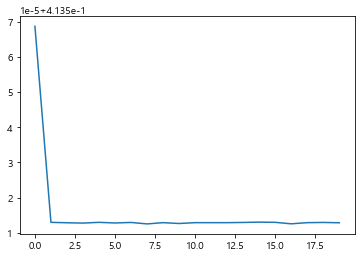

In [ ]:
model = Sequential()
# 이번 레이어에서 출력 64개 입력 13개 # 레이어 추가를 위해 활성화 함수 사용 activation
model.add(Dense(64,input_shape=(95, ), activation="sigmoid")) 

# 앞선 레이어에서 받아온 출력값들을 자동으로 입력하기 때문에 input_shape 따로 입력할 필요 없음
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(64, activation="relu"))

# 마지막 레이어는 activation 입력 필요없음
model.add(Dense(1))

model.compile(loss= "binary_crossentropy", optimizer=Adam(lr=0.0001), metrics=["binary_accuracy"])
# 지금까지 설계한 것 요약보기
model.summary()

result = model.fit(X_train, y_train, epochs=20, batch_size=10)

plt.plot(result.history["loss"])

# 예측값 확인
#print(model.predict(X_data))
pred = result.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))

ValueError: `axis` must be fewer than the number of dimensions (1)